# US Visa prediction project

In [1]:
data_link="https://www.kaggle.com/datasets/moro23/easyvisa-dataset"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
%matplotlib inline

In [3]:
df=pd.read_csv(r"Visadataset.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# categorical and numerical features

numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

print("we have {} numerical columns {} ".format(len(numeric_features), numeric_features))
print("we have {} categorical columns {} ".format(len(categorical_features),categorical_features))

we have 3 numerical columns ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 
we have 9 categorical columns ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status'] 


In [10]:
# proportion of count of data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------------")

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-----------

from above case_id has unique values and continent has
biased continent values



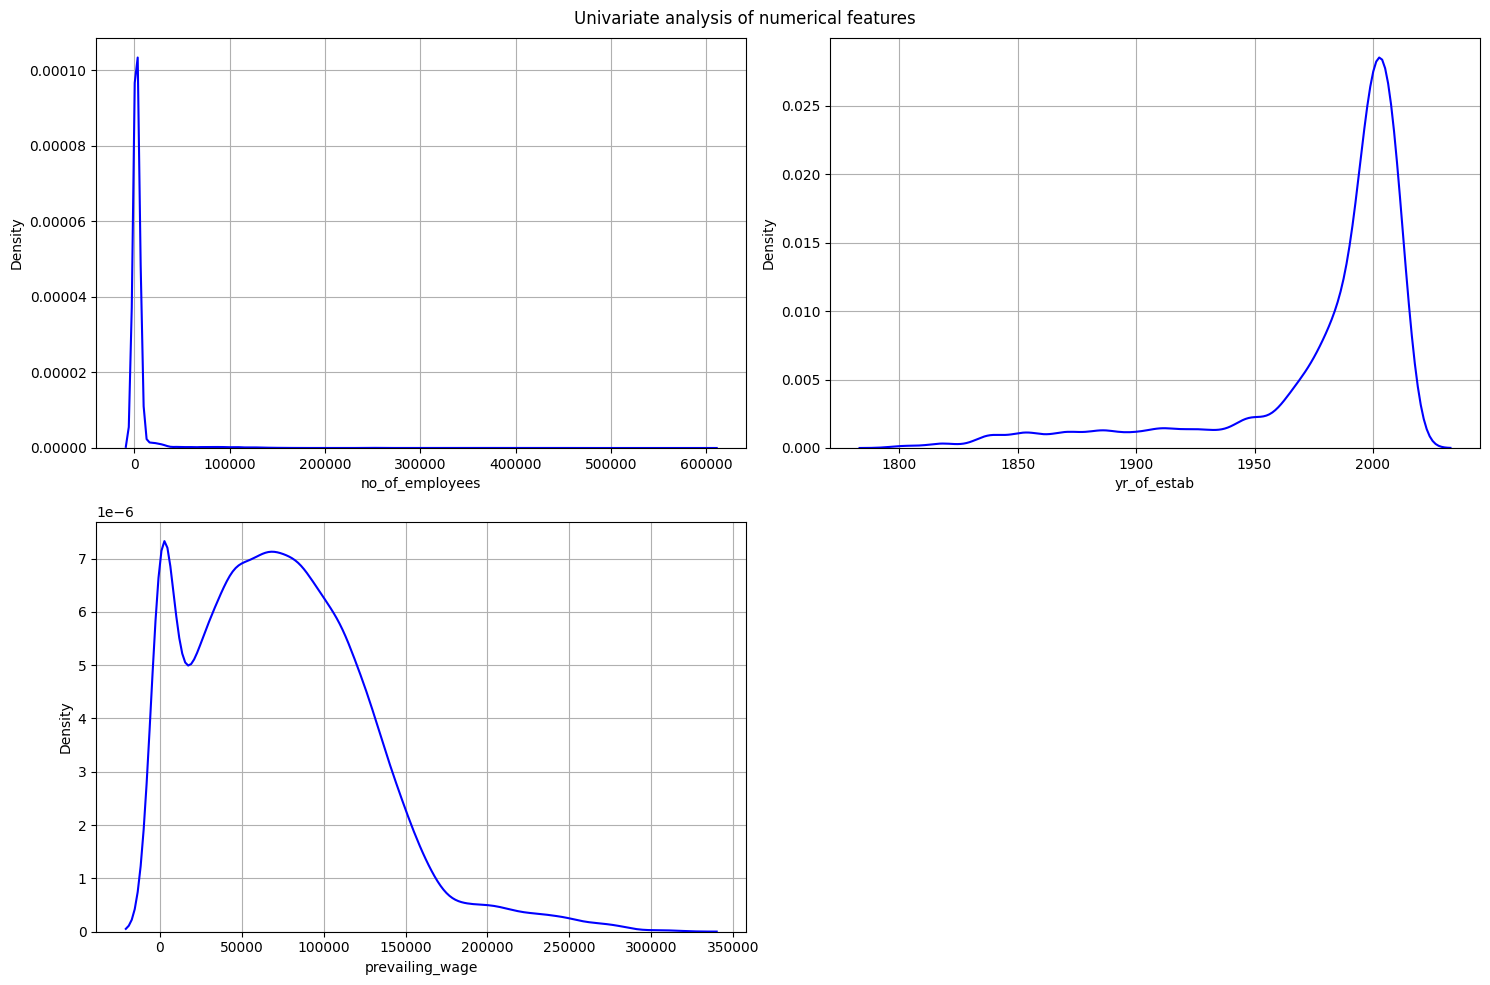

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle("Univariate analysis of numerical features")

for i in range(0,len(numeric_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numeric_features[i]],color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    plt.grid()

univariate analysis on categorical columns

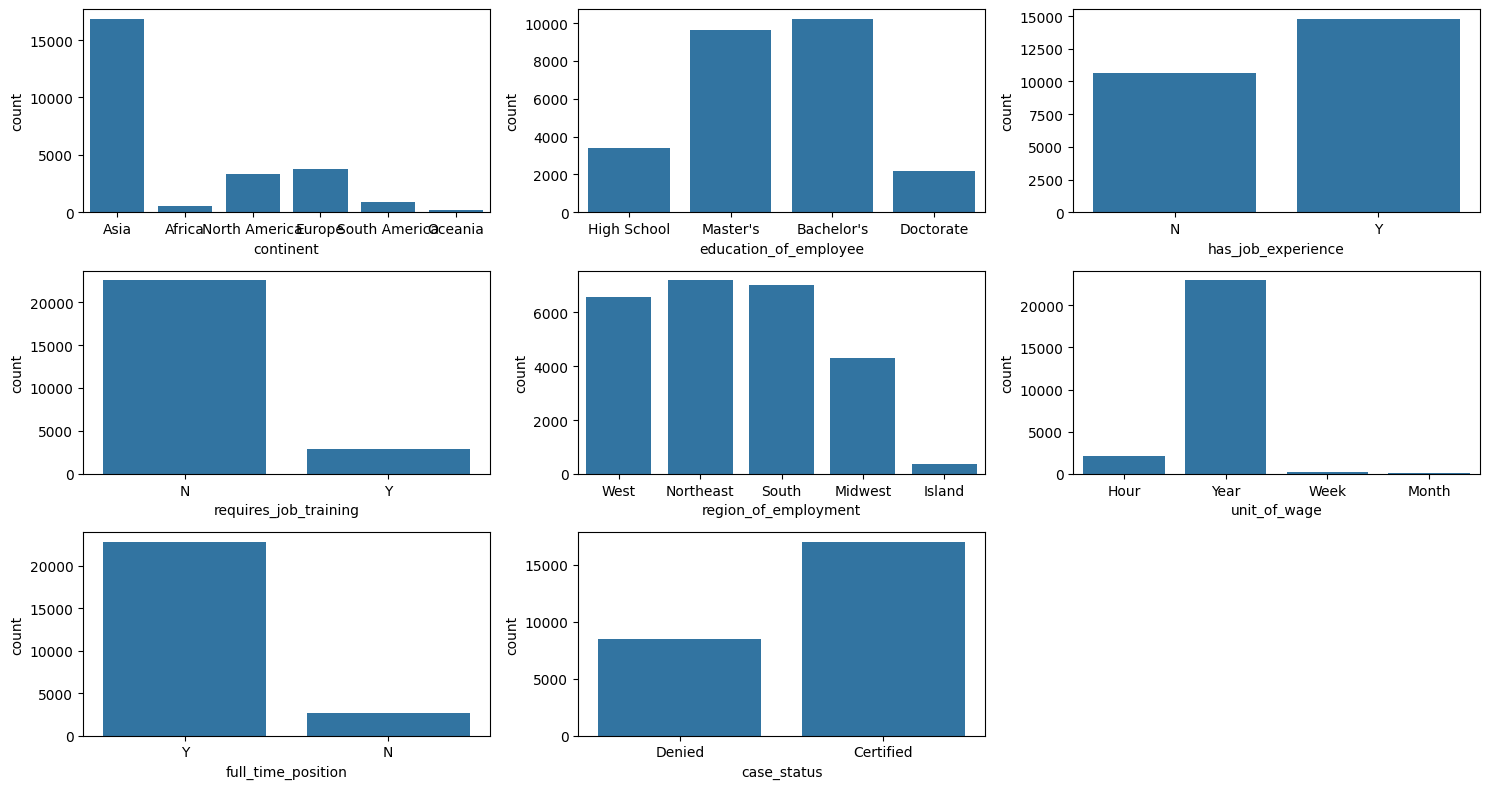

In [15]:

plt.figure(figsize=(15,8))
for i in range(0,len(categorical_features)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

multivariate analysis

In [17]:
discrete_features=[col for col in numeric_features if len(df[col].unique())<=25]
continous_features=[col for col in numeric_features if len(df[col].unique())>25]

print("we have {} discrete features {} ".format(len(discrete_features),discrete_features))
print("we have {} continuous features {} ".format(len(continous_features),continous_features))

we have 0 discrete features [] 
we have 3 continuous features ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] 


check multicollinearity in numerical features

In [18]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [25]:
dict={}
for i in continous_features:
    dict[i] = df[i]
sample=pd.DataFrame(dict)
sample.corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


No relation between continous features

# Checking multi colinearity for categorical features

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [30]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df["case_status"],feature))[1]<0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail TO Reject null hypothesis")
        
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=["Column","hypothesis Result"]
result


        

,Column,hypothesis Result
0,continent,Fail TO Reject null hypothesis
1,education_of_employee,Fail TO Reject null hypothesis
2,has_job_experience,Fail TO Reject null hypothesis
3,requires_job_training,Fail TO Reject null hypothesis
4,region_of_employment,Fail TO Reject null hypothesis
5,unit_of_wage,Fail TO Reject null hypothesis
6,full_time_position,Fail TO Reject null hypothesis
7,case_status,Fail TO Reject null hypothesis
